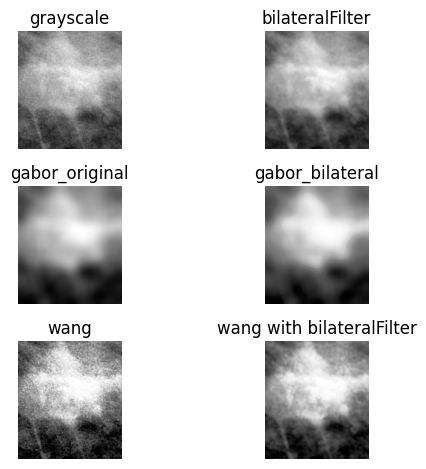

In [6]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from to_8_bit_png import apply_windowing
test_pic1 = "..\\..\\datasets\\image\\ROI_training_png\\Mass-Training_P_00001_LEFT_CC_1-1-2.png"
test_pic2 = "..\\..\\datasets\\image\\ROI_training_png\\Mass-Training_P_00001_LEFT_MLO_1-1-1.png"

threshold_factor = 0.8

imgRGB = cv2.imread(test_pic2)
#plt.subplot(3, 2, 3) 
#plt.title("")
#plt.imshow(imgRGB, cmap='gray')
#plt.axis('off')  # Turn off axis labels


img = cv2.imread(test_pic2,cv2.IMREAD_GRAYSCALE)
plt.subplot(3, 2, 1) 
plt.title("grayscale")
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axis labels

#
img_bil = cv2.bilateralFilter(img, 9, 150, 150)
plt.subplot(3, 2, 2)
plt.title("bilateralFilter")
plt.imshow(img_bil, cmap='gray')
plt.axis('off')  # Turn off axis labels


# img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# plt.imshow(img, cmap='gray')
# plt.axis('off')  # Turn off axis labels
# plt.show()

def CLAHE_RGB(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(4,4))
    img[:,:,0] = clahe.apply(img[:,:,0])
    cl_img = cv2.cvtColor(img, cv2.COLOR_LAB2BGR)

    return cl_img

def CLAHE(img):
    equ = cv2.equalizeHist(img)
    clahe = cv2.createCLAHE(clipLimit =3.0, tileGridSize=(4,4))
    cl_img = clahe.apply(img)
    ret, thresh3 = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return cl_img

def mod(im):
    # im = cv2.imread(img,0)
    img_hist = cv2.equalizeHist(im)
    gaussian_3 = cv2.GaussianBlur(img_hist, (0, 0), 2.0)
    unsharp_image = cv2.addWeighted(img_hist, 2, gaussian_3, -1.0, 0)
    median_image = cv2.medianBlur(unsharp_image, 3)
    return median_image

# Define a function for Gabor Transform
def apply_gabor_transform(img):
    # Define Gabor kernel parameters
    ksize = 31
    sigma = 20       #越大越糊
    theta = 23         
    lambd = 200      #越大越像原圖
    gamma = 0.2

    # Create Gabor kernel
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0, ktype=cv2.CV_32F)

    # Apply Gabor filter to the image
    gabor_filtered = cv2.filter2D(img, cv2.CV_32F, gabor_kernel)

     # Normalize the Gabor filtered image for visualization
    normalized_gabor = cv2.normalize(gabor_filtered, None, 0, 255, cv2.NORM_MINMAX)
    return normalized_gabor

# Apply Gabor Transform to the original and bilateral-filtered images
gabor_original = apply_gabor_transform(img)
gabor_original = gabor_original.astype(np.uint8)
#gabor_original = mod(gabor_original)

gabor_bilateral = apply_gabor_transform(img_bil)
gabor_bilateral = gabor_bilateral.astype(np.uint8)
gabor_bilateral  = mod(gabor_bilateral)


plt.subplot(3, 2, 3) 
plt.title("gabor with original")
plt.imshow(gabor_original, cmap='gray')
plt.axis('off')  # Turn off axis labels

plt.subplot(3, 2, 4) 
plt.title("gabor with bilateral")
plt.imshow(gabor_bilateral, cmap='gray')
plt.axis('off')  # Turn off axis labels

#img_cla = CLAHE(img_bil)
#plt.imshow(img_cla, cmap='gray')
#plt.axis('off')  # Turn off axis labels
#plt.show()
#
#img_cla = CLAHE(img)
#plt.imshow(img_cla, cmap='gray')
#plt.axis('off')  # Turn off axis labels
#plt.show()
#
img_mod = mod(img)
plt.subplot(3, 2, 5) 
plt.title("wang with original")
plt.imshow(img_mod, cmap='gray')
plt.axis('off')  # Turn off axis labels

img_mod = mod(img_bil)
plt.subplot(3, 2, 6) 
plt.title("wang with bilateralFilter")
plt.imshow(img_mod, cmap='gray')
plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()





#plt.title("mod with mask with blend")
#plt.imshow(blended_img, cmap='gray')
#plt.axis('off')
#plt.show()
#

# Apply Adaptive Thresholding
#adaptive_threshold_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
#plt.title("mod with bilateralFilter and Adaptive Thresholding")
#plt.imshow(adaptive_threshold_img, cmap='gray')
#plt.axis('off')
#plt.show()

#kernel = np.ones((7,7),np.uint8)
#img_open = cv2.morphologyEx(img_mod, cv2.MORPH_OPEN, kernel)
#plt.imshow(img_open, cmap='gray')
#plt.axis('off')
#plt.show()